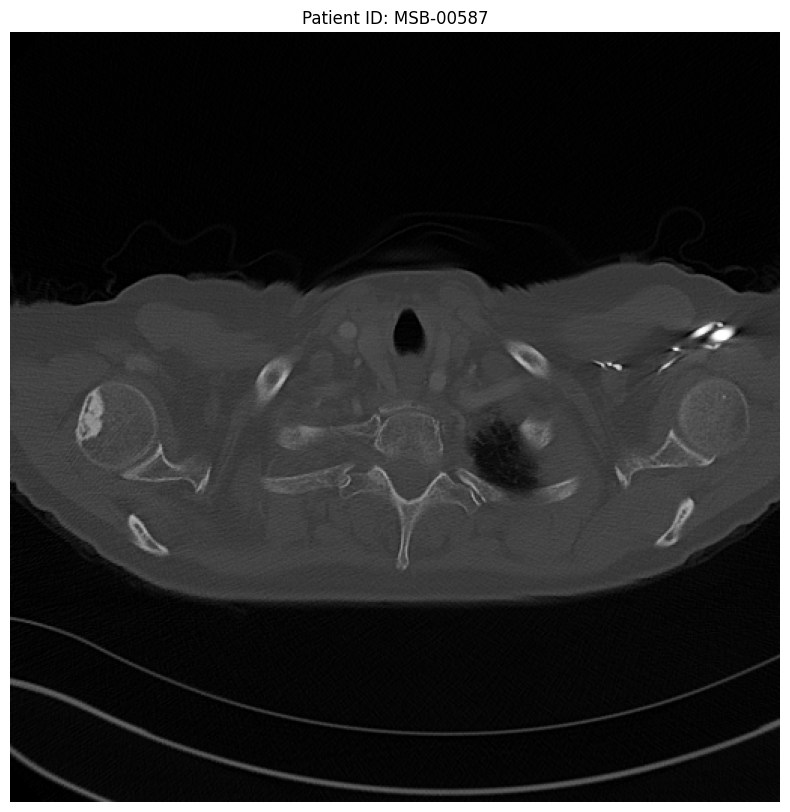

In [3]:
import pydicom
import matplotlib.pyplot as plt
import numpy as np

# Path to your .dcm file
file_path = "1-008.dcm"  

# Load the DICOM file
dicom_data = pydicom.dcmread(file_path)

# Extract image data and convert it to a visible form
image = dicom_data.pixel_array

# Normalize pixel values for better visualization
image = (image - np.min(image)) / (np.max(image) - np.min(image))

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(image, cmap='gray')
plt.title(f"Patient ID: {dicom_data.PatientID}")
plt.axis('off')
plt.show()


In [ ]:
import cv2
import numpy as np
import mahotas
from skimage.feature import graycomatrix, graycoprops

# 1️⃣ Load the Image
image_path = "Screenshot 2025-03-24 121610.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Resize for consistency
image_resized = cv2.resize(image, (256, 256))

# 2️⃣ GLCM Texture Features
def extract_glcm_features(img):
    distances = [1, 2, 3]  # Pixel distances
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]

    glcm = graycomatrix(img, distances, angles, 256, symmetric=True, normed=True)

    features = []
    for prop in ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation']:
        features.extend(graycoprops(glcm, prop).flatten())
    
    return features

glcm_features = extract_glcm_features(image_resized)

# 3️⃣ Histogram Features
hist = cv2.calcHist([image_resized], [0], None, [256], [0, 256]).flatten()

# 4️⃣ Haralick Texture Features
haralick = mahotas.features.haralick(image_resized).mean(axis=0)

# 5️⃣ Combine All Features
features = np.hstack([glcm_features, hist, haralick])

# 6️⃣ Assign Label (change to 0 or 1 based on the image class)
label = 1  # 1 → Malignant (cancerous), 0 → Benign (non-cancerous)

# Combine features with the label
features_with_label = np.append(features, label)

# Print the extracted features with label
print("\n✅ Combined Features Shape:", features_with_label.shape)
print("\n🔎 Features with Label:", features_with_label)



✅ Combined Features Shape: (330,)

🔎 Features with Label: [ 1.76269516e+02  4.83530873e+02  3.33467846e+02  4.85214441e+02
  4.45501722e+02  4.83530873e+02  4.29599133e+02  4.85214441e+02
  6.94508615e+02  7.92003286e+02  4.77085073e+02  7.94241754e+02
  3.64929534e+00  5.81454825e+00  4.81502757e+00  5.93121107e+00
  5.64320866e+00  5.81454825e+00  6.29183071e+00  5.93121107e+00
  7.12756299e+00  8.34152768e+00  7.20331028e+00  8.46188542e+00
  4.24779188e-01  4.10998277e-01  3.99587662e-01  4.07844333e-01
  4.06025105e-01  4.10998277e-01  3.95816894e-01  4.07844333e-01
  3.96143533e-01  3.76702605e-01  3.80020284e-01  3.76580790e-01
  1.14263660e-01  1.13964067e-01  1.12094115e-01  1.13591460e-01
  1.13569115e-01  1.13964067e-01  1.10987160e-01  1.13591460e-01
  1.12391105e-01  1.10425692e-01  1.09693246e-01  1.10058810e-01
  9.43525365e-01  8.34988913e-01  8.93146626e-01  8.34457942e-01
  8.47945587e-01  8.34988913e-01  8.62462359e-01  8.34457942e-01
  7.53993191e-01  7.11003674e-0